Project: Real Estate Price Predictor
Goal: Build a model to predict house prices using Linear Regression. Key Finding: I found that Average Income is a major predictor of price. My model's errors follow a normal distribution, proving the results are reliable.

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [59]:
df = pd.read_csv('data/USA_Housing.csv')
print(df.shape)
df.info()

# This tells you how many empty cells are in each column
df.isnull().sum()

(5000, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

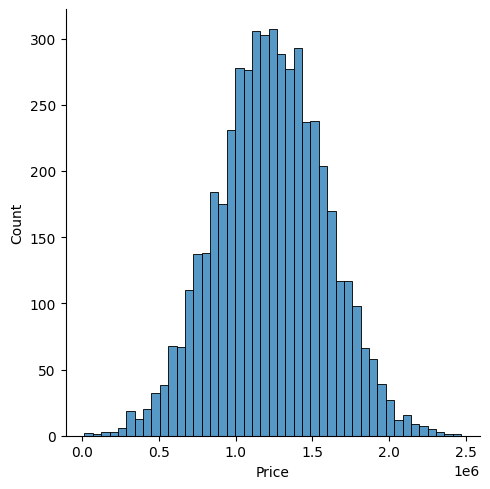

In [60]:
# We create a new version of the dataframe without the text
# 'axis=1' tells pandas to look for a column, not a row
df_numeric = df.drop('Address', axis=1)

# Check the first few rows to make sure 'Address' is gone
df_numeric.head()

sns.displot(df_numeric['Price'])

In [61]:
# X is everything we use to predict (Income, Age, Rooms, etc.)
# We drop 'Price' because that's the answer key!
X = df_numeric.drop('Price', axis=1)

# y is what we want to predict
y = df_numeric['Price']

from sklearn.model_selection import train_test_split

# This creates 4 sets of data. 
# test_size=0.3 means 30% is for the exam, 70% is for studying.
# random_state is like a "seed" so you get the same results every time you run it.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train.shape

(3500, 5)

[2.16176350e+01 1.65221120e+05 1.21405377e+05 1.31871878e+03
 1.52251955e+01]


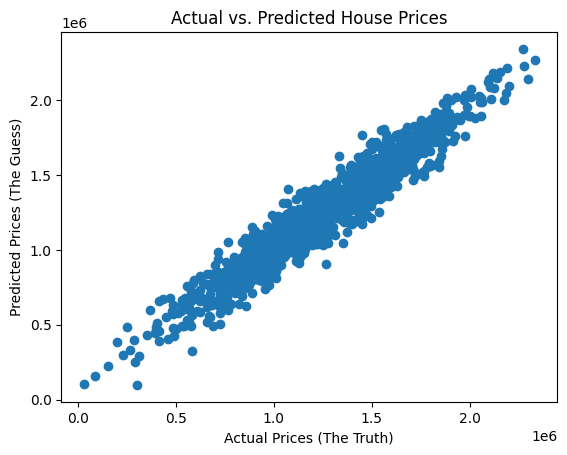

MAE: 81257.55795855941


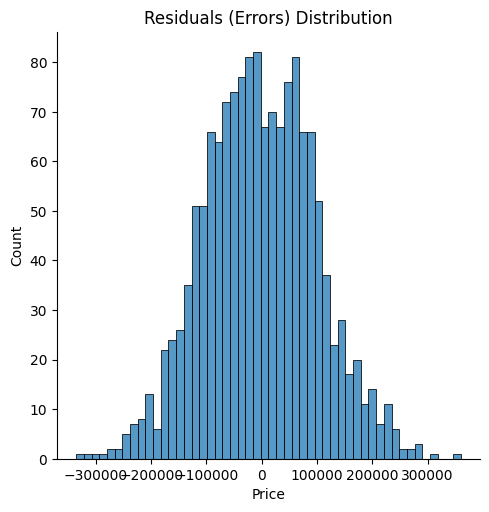

Estimated House Price: $1,175,056.88
R2 Score: 0.9185060945363622


c:\Users\rewin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [62]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)
# This shows how much each feature (like Income) affects the Price
print(lm.coef_)

# The model uses the patterns it learned to guess the prices
predictions = lm.predict(X_test)

plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices (The Truth)')
plt.ylabel('Predicted Prices (The Guess)')
plt.title('Actual vs. Predicted House Prices')
plt.show()

from sklearn import metrics
import numpy as np

print('MAE:', metrics.mean_absolute_error(y_test, predictions))

# A plot of the errors
sns.displot((y_test - predictions), bins=50)
plt.title('Residuals (Errors) Distribution')
plt.show()


def estimate_house_price(income, age, rooms, bedrooms, population):
    # We only put 4 items in this list because we dropped 'Area Population'
    house_features = [[income, age, rooms, bedrooms,population]] 
    prediction = lm.predict(house_features)
    print(f"Estimated House Price: ${prediction[0]:,.2f}")

# Now this will work!
estimate_house_price(70000, 6, 7, 4, 30000)

# This calculates the R-squared score for your test data
print('R2 Score:', metrics.r2_score(y_test, predictions))